In [14]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
def getQuartiles(df, col):
    df["quartile"] = pd.qcut(df[col], 4, labels=False)

    quartile_1 = df[df['quartile'] == 0]
    quartile_2 = df[df['quartile'] == 1]
    quartile_3 = df[df['quartile'] == 2]
    quartile_4 = df[df['quartile'] == 3]
    return [quartile_1, quartile_2, quartile_3, quartile_4]

## Analise dos dados

In [5]:
DATA_PATH = "./data"
FILE_NAME = "stackoverflow.csv"

In [6]:
pd.set_option('display.max_columns', None)
df = pd.read_csv(f"{DATA_PATH}/{FILE_NAME}")
df.sample(3)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
77225,77226,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",In-person,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Online Courses or Certification;Other online r...,Video-based Online Courses;Written Tutorials;S...,Udemy,7,7,"Developer, mobile",20 to 99 employees,I have little or no influence,NaN,Ask developers I know/work with,India,INR\tIndian rupee,NaN,Java;Kotlin;PHP;SQL,Dart;HTML/CSS;Java;JavaScript;Kotlin;PHP;Pytho...,Cloud Firestore;Firebase Realtime Database;Mon...,Cloud Firestore;Firebase Realtime Database;Mon...,Amazon Web Services (AWS);Firebase;Google Clou...,Amazon Web Services (AWS);Firebase;Google Clou...,NaN,NaN,NaN,NaN,Gradle,Gradle;Unreal Engine,Android Studio;Atom;Visual Studio;Visual Studi...,Android Studio;Visual Studio;Visual Studio Cod...,Android;Ubuntu;Windows,Android;iOS;MacOS;Ubuntu;Windows,NaN,NaN,Google Meet;Skype;Telegram;Whatsapp;Zoom,Google Meet;Skype;Telegram;Whatsapp;Zoom,ChatGPT,Bing AI;ChatGPT;Google Bard AI,NaN,NaN,Stack Overflow;Stack Exchange,Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"Yes, definitely",NaN,"No, but I plan to soon",Indifferent,NaN,Neither trust nor distrust,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,7.0,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,NaN,NaN,Never,1-2 times a week,1-2 times a week,15-30 minutes a day,Less than 15 minutes a day,None of these,"Information Services, IT, Software Development...",Too long,Neither easy nor difficult,NaN
5063,5064,I agree,I am a developer by profession,35-44 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Boots...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Formal documentation provided by the owner of ...,NaN,33,23,Other (please specify):,2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,Portugal,EUR European Euro,NaN,Bash/Shell (all shells);C;C++;HTML/CSS;JavaScr...,C;C++;HTML/CSS;Nim;Python;TypeScript,MongoDB;PostgreSQL;Redis;SQLite,NaN,Google Cloud;Hetzner;Microsoft Azure,Hetzner,Express;FastAPI;Next.js;React;Svelte;Vue.js,Svelte;Vue.js,Electron;JAX;NumPy;OpenGL;Pandas;Qt;Torch/PyTorch,Hugging Face Transformers;JAX;NumPy;Pandas;Tor...,Chocolatey;CMake;Docker;GNU GCC;Gradle;Homebre...,Chocolatey;Docker;GNU GCC;Homebrew;Meson;npm;Yarn,Jupyter Notebook/JupyterLab;Micro;Visual Studi...,Micro;Visual Studio Code,MacOS;Windows;Other (Please Specify):,MacOS;

Vamos conveter os dados de anos de programação para valores unica e exclusivamente numéricos. Vamos também remover os outliers que desviem 3 desvios padrões da coluna de salario convertido em dolares.

In [7]:
def converte_yearsCode(row, col):
    years = row[col]
    if years == 'Less than 1 year':
        years = '1'
    elif years == 'More than 50 years':
        years = '50'
    return int(years)

filtered_df = df.dropna(subset=["ConvertedCompYearly", "DevType", "YearsCode", "YearsCodePro"])
no_out_df = filtered_df[np.abs(stats.zscore(filtered_df['ConvertedCompYearly'])) < 3]
no_out_df["YearsCodePro"] = no_out_df.apply(lambda row: converte_yearsCode(row, "YearsCodePro"), axis=1)
no_out_df["YearsCode"] = no_out_df.apply(lambda row: converte_yearsCode(row, "YearsCode"), axis=1)

filtered_df.shape, no_out_df.shape

/tmp/ipykernel_1725/3579111378.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_out_df["YearsCodePro"] = no_out_df.apply(lambda row: converte_yearsCode(row, "YearsCodePro"), axis=1)
/tmp/ipykernel_1725/3579111378.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_out_df["YearsCode"] = no_out_df.apply(lambda row: converte_yearsCode(row, "YearsCode"), axis=1)


((47698, 84), (47666, 84))

### Converter salarios

Vamos ver como os dados de salário se comportam sem e com a conversão em poder de compra equivalentes usando PPP

(array([1.200e+02, 3.720e+02, 1.282e+03, 2.128e+03, 2.385e+03, 1.909e+03,
        1.334e+03, 6.620e+02, 5.340e+02, 3.490e+02, 1.370e+02, 1.370e+02,
        5.000e+01, 1.180e+02, 7.100e+01, 1.600e+01, 6.800e+01, 1.400e+01,
        1.700e+01, 2.600e+01, 3.000e+00, 5.000e+00, 4.000e+00, 9.000e+00,
        6.000e+00, 0.000e+00, 1.200e+01, 1.000e+00, 5.000e+00, 5.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 9.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 6.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([1.00000000e+00, 3.00009800e+04, 6.00009600e+04, 9.00009400e+04,
        1.20000920e+05, 1.50000900e+05, 1.80000880e+05, 2.10000860e+05,
        2.40000840e+05, 2.70000820e+05, 3.00000800e+05, 3.30000780e+05,
        3.60000760e+05, 3.90000740e+05, 4.20000720e+05, 4.50000700e+05,
        4.80000680e+05, 5.10000660e+05, 5.40000640e+05, 5.70000620e+05,
        6.000006

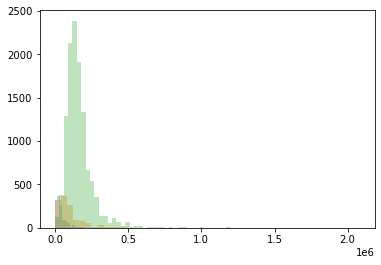

In [8]:
br_df = no_out_df[no_out_df["Country"] == "Brazil"]
br_ppp_df = no_out_df[no_out_df["Country"] == "Brazil"]
eua_df = no_out_df[no_out_df["Country"] == "United States of America"]

plt.hist(br_df["ConvertedCompYearly"], bins=50, alpha=0.33, label="Brazil")
plt.hist(br_df["ConvertedCompYearly"] * 2.44, bins=50, alpha=0.33, label="Brazil_PPP")
plt.hist(eua_df["ConvertedCompYearly"], bins=50, alpha=0.3, label="EUA")

Lista com os 30 países mais populosos na nossa base de dados e um mapa com o valor do PPP (Purchasing Power Parities).

Para converter salários em países de forma que possamos fazer uma análise justa temos que usar o fator de paridade de poder de compra (PPP). A formula para conversão de salários é:

$$ Salário_{pareado} = PPP * Salário_{convertido em dolar} $$

O PPP, neste caso, é o poder de compra relativo aos EUA. Assim, o PPP dos EUA é 1.

In [9]:
TOP10_COUNTRIES = ["United States of America", "Germany", "India", "United Kingdom of Great Britain and Northern Ireland", "Canada", "France", "Poland", "Netherlands", "Australia", "Brazil", "Italy", "Spain", "Sweden", "Switzerland", "Russian Federation", "Austria", "Israel", "Belgium", "Turkey", "Ukraine", "Denmark", "Romania", "Portugal", "Norway", "Finland", "New Zealand", "China", "Greece"]
PODER_DE_COMPRA_CONVERSAO = {
    "United States of America": (1, 139.7),
    "Germany": (0.7, 131.9),
    "India": (20.22, 216.9),
    "United Kingdom of Great Britain and Northern Ireland": (0.67, 142.7),
    "Canada": (1.17, 134.9),
    "France": (0.67, 124),
    "Poland": (1.88, 158.2),
    "Netherlands": (0.74, 137.7),
    "Australia": (1.39, 139.9),
    "Brazil": (2.44, 213.9),
    "Italy": (0.60, 128.6),
    "Spain": (0.57, 128.0),
    "Sweden": (8.51, 133.5),
    "Switzerland": (0.97, 104.4),
    "Russian Federation": (26.68, 199.4),
    "Austria": (0.71, 143.9),
    "Israel": (3.59, 118.8),
    "Belgium": (0.70, 137.8),
    "Turkey": (6.97, 834.6),
    "Ukraine": (10.52, 429.2),
    "Denmark": (6.11, 125.6),
    "Romania": (1.76, 167.7),
    "Portugal": (0.52, 126.0),
    "Norway": (8.89, 140.7),
    "Finland": (0.76, 131.0),
    "New Zealand": (1.46, 136.9),
    "China": (3.64, 132.2),
    "Greece": (0.52, 115.6)
}

/tmp/ipykernel_1725/4008719124.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top30_df["poder_de_compra"] = top30_df.apply(obtem_poder_de_compra,axis=1)


(39798, 85)

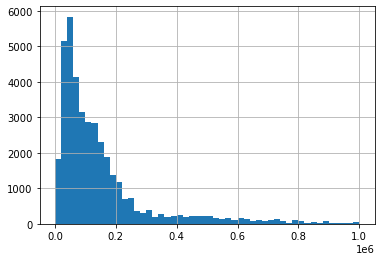

In [13]:
def obtem_poder_de_compra(row):
    vars = PODER_DE_COMPRA_CONVERSAO[row["Country"]]
    return row["ConvertedCompYearly"] * vars[0]

top30_df = no_out_df[no_out_df["Country"].isin(TOP10_COUNTRIES)]
top30_df["poder_de_compra"] = top30_df.apply(obtem_poder_de_compra,axis=1)

top30_df[top30_df["poder_de_compra"] < 1000000]["poder_de_compra"].hist(bins=50)
top30_df.shape

### Stacks

Vamos fazer o one hot encoding da lista de stacks que o indivíduo já usou no trabalho.

In [16]:
def concatena_stacks(row):
    lang = row["LanguageHaveWorkedWith"]
    # db = row["DatabaseHaveWorkedWith"]
    # platform = row["PlatformHaveWorkedWith"]
    # misc = row["MiscTechHaveWorkedWith"]
    
    languages = np.char.split("" if pd.isnull(lang) else lang, sep=';').tolist()
    # dbs = np.char.split("" if pd.isnull(db) else db, sep=';').tolist()
    # platforms = np.char.split("" if pd.isnull(platform) else platform, sep=';').tolist()
    # miscs = np.char.split("" if pd.isnull(misc) else misc, sep=';').tolist()
    
    # concatenated = languages + dbs + platforms + miscs
    concatenated = languages
    filtered = filter(lambda item: item != "", concatenated)

    return list(filtered)

stacks_df = top30_df
stacks_df["stacks"] = stacks_df.apply(concatena_stacks, axis=1)

df_exploded = stacks_df.explode(column='stacks')
df_one_hot = pd.get_dummies(df_exploded, columns=['stacks'])
df_one_hot = df_one_hot.groupby(level=0).sum()
stacks_df = df_one_hot.join(stacks_df, how="left", lsuffix='_left', rsuffix='')
stacks_df = stacks_df.drop(columns=['poder_de_compra_left'])

stacks_df.sample(1)

/tmp/ipykernel_1725/232995975.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stacks_df["stacks"] = stacks_df.apply(concatena_stacks, axis=1)
/tmp/ipykernel_1725/232995975.py:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_one_hot = df_one_hot.groupby(level=0).sum()


,ResponseId_left,YearsCode_left,YearsCodePro_left,CompTotal_left,WorkExp_left,ConvertedCompYearly_left,stacks_APL,stacks_Ada,stacks_Apex,stacks_Assembly,stacks_Bash/Shell (all shells),stacks_C,stacks_C#,stacks_C++,stacks_Clojure,stacks_Cobol,stacks_Crystal,stacks_Dart,stacks_Delphi,stacks_Elixir,stacks_Erlang,stacks_F#,stacks_Flow,stacks_Fortran,stacks_GDScript,stacks_Go,stacks_Groovy,stacks_HTML/CSS,stacks_Haskell,stacks_Java,stacks_JavaScript,stacks_Julia,stacks_Kotlin,stacks_Lisp,stacks_Lua,stacks_MATLAB,stacks_Nim,stacks_OCaml,stacks_Objective-C,stacks_PHP,stacks_Perl,stacks_PowerShell,stacks_Prolog,stacks_Python,stacks_R,stacks_Raku,stacks_Ruby,stacks_Rust,stacks_SAS,stacks_SQL,stacks_Scala,stacks_Solidity,stacks_Swift,stacks_TypeScript,stacks_VBA,stacks_Visual Basic (.Net),stacks_Zig,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly,poder_de_compra,stacks
24648,147894,36,6,420000.0,0.0,420000.0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,24649,I agree,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,NaN,6,1,"Developer, full-stack","10,000 or more employees",I have little or no influence,NaN,Ask developers I know/work with,United States of America,USD\tUnited States dollar,70000.0,Assembly;Bash/Shell (all shells);C#;Java;JavaS...,C;C#;C++;Java;SQL,Microsoft SQL Server,Microsoft SQL Server,Amazon Web Services (AWS),Amazon Web Services (AWS),NaN,NaN,.NET (5+),.NET (5+),Maven (build tool);npm,npm,Eclipse;Visual Studio;Visual Studio Code,Visual Studio;Visual Studio Code,Windows,Windows,Jira,Jira,Microsoft Teams,Microsoft Teams,NaN,NaN,NaN,NaN,Stack Overflow,Daily or almost daily,No,NaN,"Yes, somewhat",NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,70000.0,70000.0,"[Assembly, Bash/Shell (all shells), C#, Java, ..."


### DevType

In [17]:
dev_df = df[["DevType"]]
dev_df = dev_df.dropna()
dev_df.sample(3)

,DevType
56896,"Developer, full-stack"
13745,"Developer, full-stack"
3617,Data or business analyst


Todos os tipos de desenvolvedores que temos na base:

In [19]:
def get_raw_dev_type(row):
    raw = row["DevType"]
    return raw.replace('Developer, ', '')

type_df = dev_df[dev_df["DevType"].str.startswith("Developer")]
type_df = type_df.apply(get_raw_dev_type, axis=1)
type_df.unique(), type_df.unique().__len__()

(array(['back-end', 'front-end', 'full-stack',
        'desktop or enterprise applications', 'QA or test', 'mobile',
        'embedded applications or devices', 'game or graphics',
        'Developer Experience', 'Developer Advocate'], dtype=object),
 10)

Normalizemos, então, os tipos de desenvolvidores através da base

In [21]:
DEV_TYPE_BLACK_LIST = ["Student", "Designer", 'Senior-Executive-(C-Suite-VP-etc.)']

def cast_dev_type(row):
    _type = row["DevType"]
    if _type.startswith("Developer"):
        return get_raw_dev_type(row)
    if  _type == "Engineer, data":
        return "data-engineer"
    _type = _type.replace(' ', '-')
    _type = _type.replace(',', '')
    return _type

dev_df = stacks_df
dev_df["FinalDevType"] = dev_df.apply(cast_dev_type, axis=1)
dev_df = dev_df[~dev_df["FinalDevType"].isin(DEV_TYPE_BLACK_LIST)]

dev_df["FinalDevType"].unique(), dev_df["FinalDevType"].shape

(array(['back-end', 'front-end', 'full-stack', 'System-administrator',
        'QA or test', 'Data-scientist-or-machine-learning-specialist',
        'Data-or-business-analyst', 'Security-professional',
        'Research-&-Development-role', 'Database-administrator',
        'desktop or enterprise applications', 'data-engineer',
        'Product-manager', 'Cloud-infrastructure-engineer',
        'embedded applications or devices', 'Developer Experience',
        'Engineering-manager', 'Other-(please-specify):', 'mobile',
        'DevOps-specialist', 'Engineer-site-reliability',
        'Project-manager', 'Academic-researcher', 'Blockchain',
        'game or graphics', 'Developer Advocate', 'Hardware-Engineer',
        'Educator', 'Scientist', 'Marketing-or-sales-professional'],
       dtype=object),
 (39054,))

## Analise de correlacao

In [22]:
corr_stacks_df = dev_df[["stacks_APL", "stacks_Ada", "stacks_Apex", "stacks_Assembly", "stacks_Bash/Shell (all shells)", "stacks_C", "stacks_C#", "stacks_C++",
        "stacks_Clojure", "stacks_Cobol", "stacks_Crystal", "stacks_Dart", "stacks_Delphi", "stacks_Elixir", "stacks_Erlang", "stacks_F#", "stacks_Flow",
        "stacks_Fortran", "stacks_GDScript", "stacks_Go", "stacks_Groovy", "stacks_HTML/CSS", "stacks_Haskell", "stacks_Java", "stacks_JavaScript", "stacks_Julia",
        "stacks_Kotlin", "stacks_Lisp", "stacks_Lua", "stacks_MATLAB", "stacks_Nim", "stacks_OCaml", "stacks_Objective-C", "stacks_PHP", "stacks_Perl",
        "stacks_PowerShell", "stacks_Prolog", "stacks_Python", "stacks_R", "stacks_Raku", "stacks_Ruby", "stacks_Rust", "stacks_SAS", "stacks_SQL",
        "stacks_Scala", "stacks_Solidity", "stacks_Swift", "stacks_TypeScript", "stacks_VBA", "stacks_Visual Basic (.Net)", "stacks_Zig"]]
correlation = corr_stacks_df.corr()

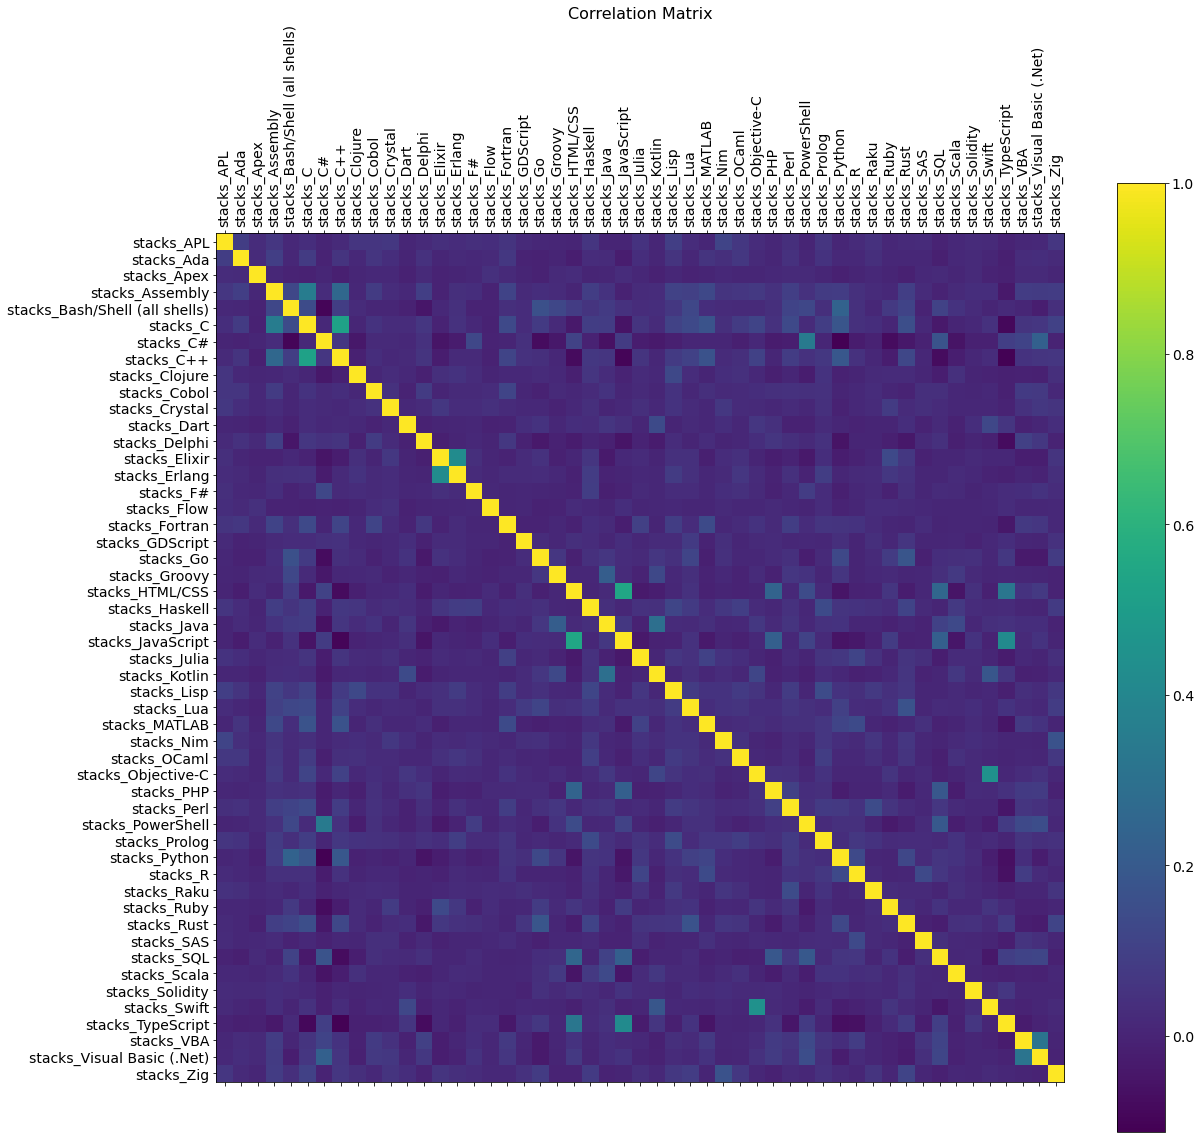

In [23]:
f = plt.figure(figsize=(19, 17))
plt.matshow(correlation, fignum=f.number)
plt.xticks(range(correlation.shape[1]), correlation.columns, fontsize=14, rotation=90)
plt.yticks(range(correlation.shape[1]), correlation.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [24]:
corr_stacks_salario_df = dev_df[["stacks_APL", "stacks_Ada", "stacks_Apex", "stacks_Assembly", "stacks_Bash/Shell (all shells)", "stacks_C", "stacks_C#", "stacks_C++",
        "stacks_Clojure", "stacks_Cobol", "stacks_Crystal", "stacks_Dart", "stacks_Delphi", "stacks_Elixir", "stacks_Erlang", "stacks_F#", "stacks_Flow",
        "stacks_Fortran", "stacks_GDScript", "stacks_Go", "stacks_Groovy", "stacks_HTML/CSS", "stacks_Haskell", "stacks_Java", "stacks_JavaScript", "stacks_Julia",
        "stacks_Kotlin", "stacks_Lisp", "stacks_Lua", "stacks_MATLAB", "stacks_Nim", "stacks_OCaml", "stacks_Objective-C", "stacks_PHP", "stacks_Perl",
        "stacks_PowerShell", "stacks_Prolog", "stacks_Python", "stacks_R", "stacks_Raku", "stacks_Ruby", "stacks_Rust", "stacks_SAS", "stacks_SQL",
        "stacks_Scala", "stacks_Solidity", "stacks_Swift", "stacks_TypeScript", "stacks_VBA", "stacks_Visual Basic (.Net)", "stacks_Zig", "poder_de_compra"]]
correlation = corr_stacks_salario_df.corr()["poder_de_compra"]

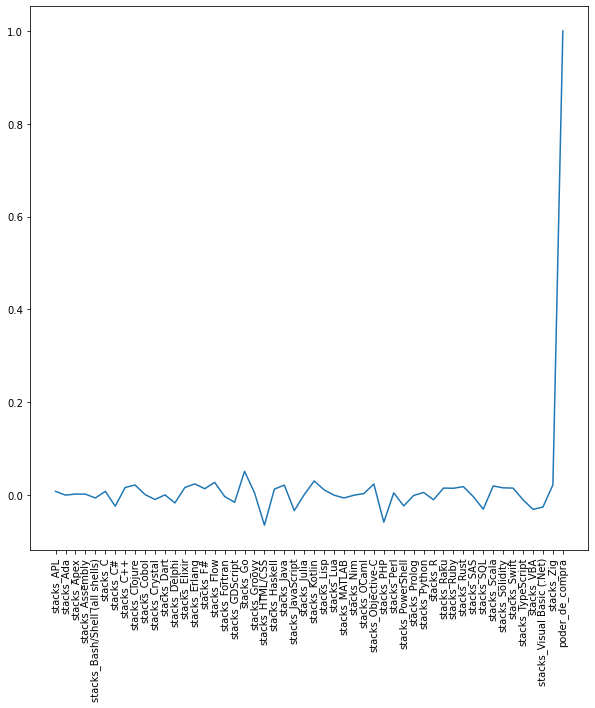

In [25]:
f = plt.figure(figsize=(10, 10))
plt.plot(correlation)
plt.xticks(rotation=90)
plt.show()

In [26]:
outros_salario_df = dev_df[["Age","Employment","RemoteWork","EdLevel","YearsCode","YearsCodePro","OrgSize","Country","poder_de_compra","FinalDevType"]]
outros_salario_df.sample(1)

,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,OrgSize,Country,poder_de_compra,FinalDevType
6518,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,10,100 to 499 employees,United States of America,200000.0,back-end


In [27]:
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old', 
    '35-44 years old', '45-54 years old', '55-64 years old', 
    '65 years or older', 'Prefer not to say'
]
age_mapping = {age: idx for idx, age in enumerate(age_order)}

remote_order = ['Remote', 'Hybrid (some remote, some in-person)', 'In-person']
remote_mapping = {remote: idx for idx, remote in enumerate(remote_order)}

outros_salario_df['Age'] = outros_salario_df['Age'].map(age_mapping)
outros_salario_df['RemoteWork'] = outros_salario_df['RemoteWork'].map(remote_mapping)

/tmp/ipykernel_1725/2320306513.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outros_salario_df['Age'] = outros_salario_df['Age'].map(age_mapping)
/tmp/ipykernel_1725/2320306513.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outros_salario_df['RemoteWork'] = outros_salario_df['RemoteWork'].map(remote_mapping)


/tmp/ipykernel_1725/3447163803.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  numericos_salario_corr = outros_salario_df.corr()


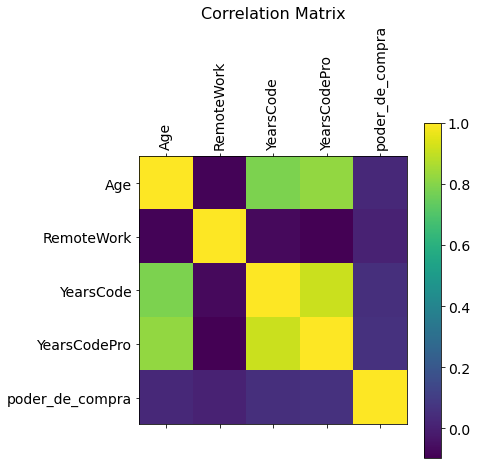

In [28]:
numericos_salario_corr = outros_salario_df.corr()

f = plt.figure(figsize=(6, 6))
plt.matshow(numericos_salario_corr, fignum=f.number)
plt.xticks(range(numericos_salario_corr.shape[1]), numericos_salario_corr.columns, fontsize=14, rotation=90)
plt.yticks(range(numericos_salario_corr.shape[1]), numericos_salario_corr.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

### Distribuições

In [102]:
import math
def plotUniques(df, col, target_col):
    # uniques = df[col].unique()
    # f = plt.figure(figsize=(8, 6))

    # for unique in uniques:
    #     subset = df[df[col] == unique]
    #     plt.hist(subset[target_col], bins=50,label=f'{unique}', alpha=0.3, log=True)
    
    # plt.title(f'Density Curves for {target_col} by Categories in Nominal Columns')
    # plt.xlabel(target_col)
    # plt.ylabel('Density')
    # plt.legend()
    # plt.show()
    uniques = df[col].unique()
    num_uniques = len(uniques)
    
    # Determine the number of rows and columns for the grid
    num_cols = 3
    num_rows = math.ceil(num_uniques / num_cols)
    
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols * 6, num_rows * 4))
    axs = axs.flatten()  # Flatten the array to make indexing easier
    
    for i, unique in enumerate(uniques):
        subset = df[df[col] == unique]
        axs[i].hist(subset[target_col], bins=50, label=f'{unique}', alpha=0.7, log=True)
        axs[i].set_title(f'{unique}')
        axs[i].set_xlabel(target_col)
        axs[i].set_ylabel('Density')
        axs[i].legend()

    # Hide any unused subplots
    for j in range(i + 1, num_rows * num_cols):
        fig.delaxes(axs[j])
    
    fig.suptitle(f'Density Curves for {target_col} by Categories in {col}', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
    plt.show()

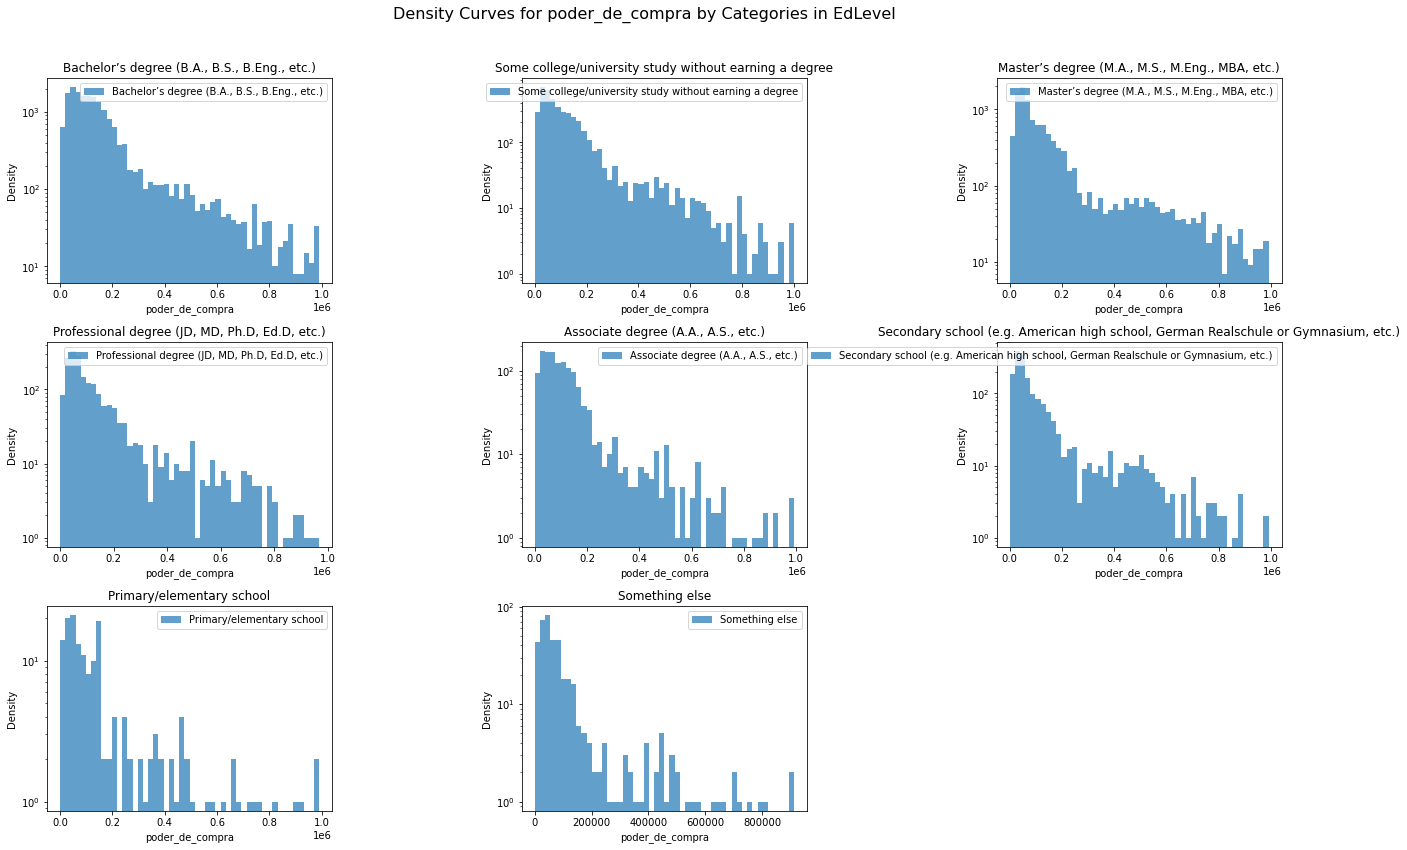

In [103]:
tmp_df = outros_salario_df
tmp_df = tmp_df[tmp_df["poder_de_compra"] < 1000000]
plotUniques(tmp_df, "EdLevel", "poder_de_compra")

## Subgroup Discovery

Vamos tentar descobrir subgrupos interessantes sobre a nossa base. Para tal, precisamos tratar um pouco a base e fazermos algumas análises.

### Filtragens para algortimos

<AxesSubplot:>

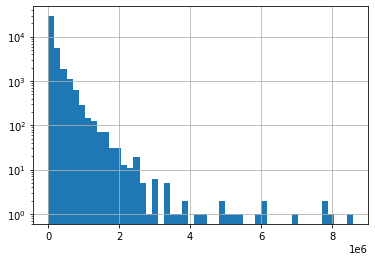

In [77]:
final_df = dev_df
final_df["poder_de_compra"].hist(bins=50, log=True)

Temos poucas pessoas com mais de 2 milhões de dolares em salário.

In [78]:
final_df[final_df["poder_de_compra"] > 2000000][["poder_de_compra", "Country", "FinalDevType"]]

,poder_de_compra,Country,FinalDevType
626,2401200.00,Russian Federation,Research-&-Development-role
706,2127703.32,Russian Federation,back-end
2140,5175220.34,Sweden,full-stack
5410,2450037.18,India,back-end
5833,2819419.05,Norway,embedded applications or devices
...,...,...,...
85853,6066000.00,India,back-end
86268,6860100.06,India,Hardware-Engineer
86587,3301836.76,Russian Federation,Engineering-manager
86829,2267800.00,Russian Federation,back-end


Aqui, portanto, filtraremos um pouco mais os outliers da calda superior da nossa base. 

(38974, 144)

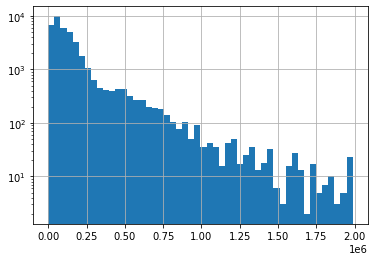

In [79]:
final_df = final_df[final_df["poder_de_compra"] < 2000000]

final_df["poder_de_compra"].hist(bins=50, log=True)
final_df.shape

<AxesSubplot:>

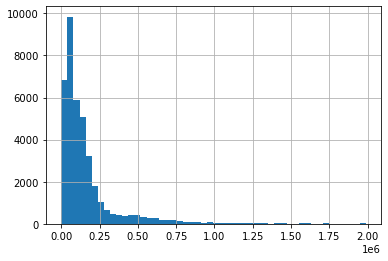

In [80]:
final_df["poder_de_compra"].hist(bins=50)

In [81]:
final_df.sample(2)

,ResponseId_left,YearsCode_left,YearsCodePro_left,CompTotal_left,WorkExp_left,ConvertedCompYearly_left,stacks_APL,stacks_Ada,stacks_Apex,stacks_Assembly,stacks_Bash/Shell (all shells),stacks_C,stacks_C#,stacks_C++,stacks_Clojure,stacks_Cobol,stacks_Crystal,stacks_Dart,stacks_Delphi,stacks_Elixir,stacks_Erlang,stacks_F#,stacks_Flow,stacks_Fortran,stacks_GDScript,stacks_Go,stacks_Groovy,stacks_HTML/CSS,stacks_Haskell,stacks_Java,stacks_JavaScript,stacks_Julia,stacks_Kotlin,stacks_Lisp,stacks_Lua,stacks_MATLAB,stacks_Nim,stacks_OCaml,stacks_Objective-C,stacks_PHP,stacks_Perl,stacks_PowerShell,stacks_Prolog,stacks_Python,stacks_R,stacks_Raku,stacks_Ruby,stacks_Rust,stacks_SAS,stacks_SQL,stacks_Scala,stacks_Solidity,stacks_Swift,stacks_TypeScript,stacks_VBA,stacks_Visual Basic (.Net),stacks_Zig,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly,poder_de_compra,stacks,FinalDevType
77609,388050,75,45,450000.0,0.0,481905.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,77610,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Hackathons (virtual or ...,Formal documentation provided by the owner of ...,NaN,15,9,Engineering manager,20 to 99 employees,I have some influence,Investigate,Start a free trial;Ask developers I know/work ...,France,EUR European Euro,90000.0,Elixir;HTML/CSS;JavaScript;OCaml;Python,OCaml,PostgreSQL;SQLite,PostgreSQL;SQLite,Google Cloud,Google Cloud,NaN,NaN,NaN,NaN,Docker;Homebrew,NaN,Jupyter Notebook/JupyterLab;Visual Studio Code,Visual Studio Code,MacOS;Ubuntu;Windows;Windows Subsystem for Lin...,MacOS,Notion;Trello,NaN,Google Meet;Signal;Whatsapp;Zoom,NaN,ChatGPT,ChatGPT,GitHub Copilot,GitHub Copilot;Replit Ghostwriter,Stack Overflow;Stack Exchange,Less than once per month or monthly,Yes,Less than once per month or monthly,"No, not really","Please do! The more people driving innovation,...",Yes,Very favorable,Increase productivity;Greater efficiency;Speed...,Neither trust nor distrust,Learning about a codebase;Project planning;Deb...,Writing code;Documenting code;Testing code,NaN,Writing code;Documenting code;Testing code,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,96381.0,64575.27,"[Elixir, HTML/CSS, JavaScript, OCaml, Python]",Engineering-manager
81312,325252,184,160,720000.0,0.0,720000.0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81313,I agree,"I am not primarily a developer, but I write co...",55-64 yea

Aqui iremos fazer alguns tratamentos na base para que ela seja utilizada como entrada para os demais metodos de mineração de subgrupos no Cortana. Iremos dropar todas colunas que não serao utilizadas, removeremos dados nulos e removeremos espaços (cortana nao consegue lidar bem com colunas que tenham espaços).

In [82]:
SPACE_COLS = ["Age", "Employment", "RemoteWork", "EdLevel", "OrgSize", "Country"]

def removeSpace(str):
    return str.replace(' ', '-').replace(',', '')

def handleSpaceCols(row, col):
    if row[col] is None:
        return 0
    return removeSpace(row[col])

subgroup_df = final_df.drop(columns=["YearsCode_left", "YearsCodePro_left", "ResponseId_left", "CompTotal_left", "WorkExp_left", "ConvertedCompYearly_left", "ResponseId", "Q120", "MainBranch",
                                     "CodingActivities", "LearnCode", "LearnCodeOnline", "LearnCodeCoursesCert", "DevType", "PurchaseInfluence",
                                     "TechList", "BuyNewTool", "Currency", "CompTotal", "LanguageHaveWorkedWith", "LanguageWantToWorkWith", "DatabaseHaveWorkedWith",
                                     "DatabaseWantToWorkWith", "PlatformHaveWorkedWith", "PlatformWantToWorkWith", "WebframeHaveWorkedWith", "WebframeWantToWorkWith",
                                     "MiscTechHaveWorkedWith", "MiscTechWantToWorkWith", "ToolsTechHaveWorkedWith", "ToolsTechWantToWorkWith", "NEWCollabToolsHaveWorkedWith",
                                     "NEWCollabToolsWantToWorkWith", "OpSysPersonal use", "OpSysProfessional use", "OfficeStackAsyncHaveWorkedWith",
                                     "OfficeStackAsyncWantToWorkWith", "AISearchHaveWorkedWith", "AISearchWantToWorkWith", "AIDevHaveWorkedWith", 
                                     "AIDevWantToWorkWith", "NEWSOSites", "SOVisitFreq", "SOAccount", "SOPartFreq", "SOComm", "SOAI", "AISelect", 
                                     "AISent", "AIAcc", "AIBen", "AIToolInterested in Using", "AIToolCurrently Using", 
                                     "AIToolNot interested in Using", "AINextVery different", "AINextNeither different nor similar", 
                                     "AINextSomewhat similar", "AINextVery similar", "AINextSomewhat different", "TBranch", "ICorPM", "WorkExp", 
                                     "Knowledge_1", "Knowledge_2", "Knowledge_3", "Knowledge_4", "Knowledge_5", "Knowledge_6", "Knowledge_7", 
                                     "Knowledge_8", "Frequency_1", "Frequency_2", "Frequency_3", "TimeSearching", "TimeAnswering", "ProfessionalTech",
                                     "Industry", "SurveyLength", "SurveyEase", "ConvertedCompYearly", "OfficeStackSyncHaveWorkedWith",
                                     "OfficeStackSyncWantToWorkWith", "stacks"])
subgroup_df = subgroup_df.dropna(subset=["OrgSize"])

for col in SPACE_COLS:
    subgroup_df[col] = subgroup_df.apply(lambda row: handleSpaceCols(row, col), axis=1)
subgroup_df.sample(1)

,stacks_APL,stacks_Ada,stacks_Apex,stacks_Assembly,stacks_Bash/Shell (all shells),stacks_C,stacks_C#,stacks_C++,stacks_Clojure,stacks_Cobol,stacks_Crystal,stacks_Dart,stacks_Delphi,stacks_Elixir,stacks_Erlang,stacks_F#,stacks_Flow,stacks_Fortran,stacks_GDScript,stacks_Go,stacks_Groovy,stacks_HTML/CSS,stacks_Haskell,stacks_Java,stacks_JavaScript,stacks_Julia,stacks_Kotlin,stacks_Lisp,stacks_Lua,stacks_MATLAB,stacks_Nim,stacks_OCaml,stacks_Objective-C,stacks_PHP,stacks_Perl,stacks_PowerShell,stacks_Prolog,stacks_Python,stacks_R,stacks_Raku,stacks_Ruby,stacks_Rust,stacks_SAS,stacks_SQL,stacks_Scala,stacks_Solidity,stacks_Swift,stacks_TypeScript,stacks_VBA,stacks_Visual Basic (.Net),stacks_Zig,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,OrgSize,Country,poder_de_compra,FinalDevType
31872,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25-34-years-old,Employed-full-time,Remote,Master’s-degree-(M.A.-M.S.-M.Eng.-MBA-etc.),13,12,100-to-499-employees,United-States-of-America,171350.0,back-end


### Slices DB into quartiles

Obteremos os quartís da base para fazermos uma análise mais apurada em função aos quartís da extremidade

In [83]:
[quartile_1, quartile_2, quartile_3, quartile_4] = getQuartiles(subgroup_df, 'poder_de_compra')

Aqui iremos apenas z-normalizar os dados que desejamos salvar como entrada para o cortana. Caso deseje mudar o quartil a ser analisado, apenas mude a 3ª linha deste bloco.

Caso o quartil a ser utilizado seja o 4º, recomendamos usar o log10 comentado, pois a calda pode ser muito longa e pode afetar a visualização dos dados.

count    9.751000e+03
mean    -5.538022e-17
std      1.000051e+00
min     -2.581988e+00
25%     -6.392514e-01
50%      1.477065e-01
75%      8.301582e-01
max      1.479716e+00
Name: poder_de_compra, dtype: float64

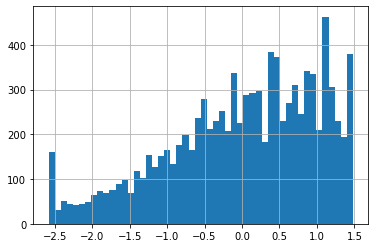

In [89]:
scaler = StandardScaler()

to_save = quartile_1.drop(columns=["quartile"])
to_save["poder_de_compra"] = scaler.fit_transform(to_save[["poder_de_compra"]])
# to_save["poder_de_compra"] = np.log10(to_save["poder_de_compra"])
to_save["poder_de_compra"].hist(bins=50)
to_save["poder_de_compra"].describe()

In [90]:
SUBGROUP_OUTPUT_PATH = "./data/in/in_sd_1_6,7_z-norm.csv"

to_save.to_csv(SUBGROUP_OUTPUT_PATH, index=False)

### Resultados

Todos resultados obtidos não utilizaram das colunas de stacks. Refinement depth sempre foi 7 e max subrgroups foi 5.

#### 1- 4º quartil `AND` sem z-normalização mas com log10 aplicado `AND` poder de compra < 350000

A seguir está apresentado as métricas usadas no cortana para obter os resultados a seguir. É importante ressaltar que para a base abaixod e 350.000 dolares nós fizemos 2 testes:

1- A base com as colunas de `YearsCode` e `YearsCodePro` ativadas (resultado pode ser visto em `./data/out/SD/1/acima_4_quantile_suecia_outlie<350000.csv`).

2- Essas mesmas colunas desativadas (resultado pode ser visto em `./data/out/SD/1/acima_4_quantile_suecia_india_outlie<350000.csv`).

Iremos mostrar os resultados de `(2)` pois o resultado de 1 apenas reforçava os subgrupos relacionados à Suécia, enquanto `(1)` possuía subgrupos de maior diversidade, como veremos abaixo.

![a](data/imgs/sd-1.png){height=300px}

In [49]:
to_save[to_save["poder_de_compra"] < 350000]["poder_de_compra"].describe()

count    8655.000000
mean        5.294280
std         0.099751
min         5.158362
25%         5.209332
50%         5.276281
75%         5.361728
max         5.543026
Name: poder_de_compra, dtype: float64

Resultados:

In [57]:
result_1 = pd.read_csv("./data/out/SD/1/acima_4_quantile_suecia_india_outlie<350000.csv", "\t")
result_1

/tmp/ipykernel_1725/3455787646.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  result_1 = pd.read_csv("./data/out/SD/1/acima_4_quantile_suecia_india_outlie<350000.csv", "\t")


,Nr.,Depth,Coverage,Quality,Average,St. Dev.,p-Value,Conditions
0,1,1,489,0.022808,5.362841,0.115212,NaN,Country = 'India'
1,2,2,432,0.020876,5.366105,0.114653,NaN,Country = 'India' AND Employment = 'Employed-f...
2,3,1,97,0.019173,5.474681,0.064695,NaN,Country = 'Sweden'
3,4,2,379,0.018062,5.360752,0.117345,NaN,Country = 'India' AND EdLevel = 'Bachelor’s-de...
4,5,2,83,0.017696,5.482628,0.051838,NaN,Country = 'Sweden' AND Employment = 'Employed-...


<figure>
<img src="data/imgs/sd-1-suecia.png" height="250px"/>
<figcaption>Resultado linha 3</figcaption>
</figure>

<!-- ![suecia](){} -->

Caso deseje ver mais curvas de distribuição dessa população, lembre-se de que a população é somente abaixo dos 350mil dolares.

#### 2- 4º quartil `AND` sem z-normalização mas com log10 aplicado `AND` poder de compra < 2000000

A seguir está apresentado as métricas usadas no cortana para obter os resultados a seguir. É importante ressaltar que para a base abaixo de 2.000.000 dolares nós fizemos 1 teste:

1- A base com as colunas de `YearsCode` e `YearsCodePro` desativadas (resultado pode ser visto em `./data/out/SD/2/acima_4_quantile_russia_noruega_2milhoes.csv`).

![a](data/imgs/sd-2.png){height=300px}

In [ ]:
to_save[to_save["poder_de_compra"] < 2000000]["poder_de_compra"].describe()

count    9594.000000
mean        5.546624
std         0.248130
min         5.244095
25%         5.322219
50%         5.477121
75%         5.721906
max         6.298243
Name: poder_de_compra, dtype: float64

In [73]:
result_2 = pd.read_csv("./data/out/SD/2/acima_4_quantile_russia_noruega_2milhoes.csv", "\t")
result_2

/tmp/ipykernel_1725/3067680913.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  result_2 = pd.read_csv("./data/out/SD/2/acima_4_quantile_russia_noruega_2milhoes.csv", "\t")


,Nr.,Depth,Coverage,Quality,Average,St. Dev.,p-Value,Conditions
0,1,1,467,25.199373,5.835924,0.130176,NaN,Country = 'Norway'
1,2,1,306,25.159840,5.903466,0.280342,NaN,Country = 'Russian-Federation'
2,3,1,1318,24.099457,5.711295,0.258531,NaN,Country = 'India'
3,4,2,252,23.664824,5.916481,0.264230,NaN,Country = 'Russian-Federation' AND Employment ...
4,5,2,416,22.918104,5.825394,0.117201,NaN,Country = 'Norway' AND Employment = 'Employed-...


<figure>
<img src="data/imgs/sd-2-noruega.png" height="250px"/>
<figcaption>Resultado linha 1</figcaption>
</figure>

<figure>
<img src="data/imgs/sd-2-russia.png" height="250px"/>
<figcaption>Resultado linha 2</figcaption>
</figure>

#### 3- 4º quartil `AND` sem z-normalização mas com log10 aplicado `AND` poder de compra < 2000000 `AND` Country, YearsCode e YearsCodePro desativados

A seguir está apresentado as métricas usadas no cortana para obter os resultados a seguir. É importante ressaltar que para a base abaixo de 2.000.000 dolares nós fizemos 1 teste:

1- A base com as colunas de `YearsCode`, `YearsCodePro` e `Country` (por ser uma coluna de alta dominação sobre as outras, decidimos fazer alguns testes sem levar em consideração esta coluna para entendermos quais padrões o algoritmo conseguirir captar) desativadas (resultado pode ser visto em `./data/out/SD/3/acima_4_quartile_master_hybrid_2000000.csv`).

![a](data/imgs/sd-3.png){height=300px}

In [70]:
to_save[to_save["poder_de_compra"] < 2000000]["poder_de_compra"].describe()

count    9594.000000
mean        5.546624
std         0.248130
min         5.244095
25%         5.322219
50%         5.477121
75%         5.721906
max         6.298243
Name: poder_de_compra, dtype: float64

In [72]:
result_3 = pd.read_csv("./data/out/SD/3/acima_4_quartile_master_hybrid_2000000.csv", "\t")
result_3

/tmp/ipykernel_1725/480317273.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  result_3 = pd.read_csv("./data/out/SD/3/acima_4_quartile_master_hybrid_2000000.csv", "\t")


,Nr.,Depth,Coverage,Quality,Average,St. Dev.,p-Value,Conditions
0,1,2,1137,12.620914,5.639455,0.254283,NaN,RemoteWork = 'Hybrid-(some-remote-some-in-pers...
1,2,2,1137,12.620914,5.639455,0.254283,NaN,EdLevel = 'Master’s-degree-(M.A.-M.S.-M.Eng.-M...
2,3,1,3899,12.447682,5.596046,0.241376,NaN,RemoteWork = 'Hybrid-(some-remote-some-in-pers...
3,4,2,1167,12.099188,5.634464,0.251312,NaN,Age = '25-34-years-old' AND EdLevel = 'Master’...
4,5,2,1167,12.099188,5.634464,0.251312,NaN,EdLevel = 'Master’s-degree-(M.A.-M.S.-M.Eng.-M...


<figure>
<img src="data/imgs/sd-3-masters.png" height="250px"/>
<figcaption>Resultado linha 2</figcaption>
</figure>

<figure>
<img src="data/imgs/sd-3-masters-jovem.png" height="250px"/>
<figcaption>Resultado linha 5</figcaption>
</figure>

#### 4- 4º quartil `AND` sem z-normalização mas com log10 aplicado `AND` poder de compra < 2000000 `AND` YearsCode e YearsCodePro desativados

A seguir está apresentado as métricas usadas no cortana para obter os resultados a seguir. É importante ressaltar que para a base abaixo de 2.000.000 dolares nós fizemos 1 teste:

1- A base com as colunas de `YearsCode`, `YearsCodePro` desativadas (resultado pode ser visto em `./data/out/SD/4/abaixo_4_quantile_eua_2000000.csv`).

![a](data/imgs/sd-4.png){height=300px}

In [74]:
to_save[to_save["poder_de_compra"] < 2000000]["poder_de_compra"].describe()

count    9594.000000
mean        5.546624
std         0.248130
min         5.244095
25%         5.322219
50%         5.477121
75%         5.721906
max         6.298243
Name: poder_de_compra, dtype: float64

In [76]:
result_4 = pd.read_csv("./data/out/SD/4/abaixo_4_quantile_eua_2000000.csv", "\t")
result_4

/tmp/ipykernel_1725/472844225.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  result_4 = pd.read_csv("./data/out/SD/4/abaixo_4_quantile_eua_2000000.csv", "\t")


,Nr.,Depth,Coverage,Quality,Average,St. Dev.,p-Value,Conditions
0,1,1,3856,0.113408,5.388436,0.139447,NaN,Country = 'United-States-of-America'
1,2,2,3478,0.102590,5.387294,0.140230,NaN,Country = 'United-States-of-America' AND Emplo...
2,3,2,2357,0.082986,5.374094,0.127122,NaN,Country = 'United-States-of-America' AND Remot...
3,4,3,2051,0.073071,5.372116,0.128229,NaN,Country = 'United-States-of-America' AND Emplo...
4,5,3,2051,0.073071,5.372116,0.128229,NaN,Country = 'United-States-of-America' AND Remot...


Note como a média dos subgrupos estão abaixo da média populacional apresentada acima.

<figure>
<img src="data/imgs/sd-4-eua.png" height="250px"/>
<figcaption>Resultado linha 1</figcaption>
</figure>

#### 5- 4º quartil `AND` com z-normalização `AND` poder de compra < 2000000 `AND` YearsCode e YearsCodePro desativados

A seguir está apresentado as métricas usadas no cortana para obter os resultados a seguir. É importante ressaltar que para a base abaixo de 2.000.000 dolares nós fizemos 1 teste:

1- A base com as colunas de `YearsCode`, `YearsCodePro` desativadas (resultado pode ser visto em `./data/out/SD/5/abaixo_5_quantile_remoto_2milhoes.csv`).

![a](data/imgs/sd-5.png){height=300px}

In [86]:
to_save[to_save["poder_de_compra"] < 2000000]["poder_de_compra"].describe()

count    9.594000e+03
mean    -5.554587e-17
std      1.000052e+00
min     -8.271064e-01
25%     -7.114819e-01
50%     -4.104937e-01
75%      3.490528e-01
max      5.232054e+00
Name: poder_de_compra, dtype: float64

In [88]:
result_5 = pd.read_csv("./data/out/SD/5/abaixo_5_quantile_remoto_2milhoes.csv", "\t")
result_5

/tmp/ipykernel_1725/4260977345.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  result_5 = pd.read_csv("./data/out/SD/5/abaixo_5_quantile_remoto_2milhoes.csv", "\t")


,Nr.,Depth,Coverage,Quality,Average,St. Dev.,p-Value,Conditions
0,1,1,4480,0.022522,-0.157542,1.012564,NaN,RemoteWork = 'Remote'
1,2,2,3469,0.018439,-0.187554,0.973169,NaN,RemoteWork = 'Remote' AND Employment = 'Employ...
2,3,2,2417,0.017198,-0.233504,0.948633,NaN,RemoteWork = 'Remote' AND EdLevel = 'Bachelor’...
3,4,3,1968,0.015722,-0.262065,0.907054,NaN,RemoteWork = 'Remote' AND Employment = 'Employ...
4,5,3,1968,0.015722,-0.262065,0.907054,NaN,RemoteWork = 'Remote' AND EdLevel = 'Bachelor’...


Note como a média dos subgrupos estão abaixo da média populacional apresentada acima.

<figure>
<img src="data/imgs/sd-5-remote.png" height="250px"/>
<figcaption>Resultado linha 1</figcaption>
</figure>

<figure>
<img src="data/imgs/sd-5-remote-bachelor.png" height="250px"/>
<figcaption>Resultado linha 3</figcaption>
</figure>

#### 6- 1º quartil `AND` com z-normalização `AND` YearsCode e YearsCodePro desativados

A seguir está apresentado as métricas usadas no cortana para obter os resultados a seguir. É importante ressaltar que para a base abaixo de 2.000.000 dolares nós fizemos 1 teste:

1- A base com as colunas de `YearsCode`, `YearsCodePro` desativadas (resultado pode ser visto em `./data/out/SD/6/abaixo_acima_1_quantile_alemanha_italia.csv`).

![a](data/imgs/sd-6.png){height=300px}

In [92]:
to_save["poder_de_compra"].describe()

count    9.751000e+03
mean    -5.538022e-17
std      1.000051e+00
min     -2.581988e+00
25%     -6.392514e-01
50%      1.477065e-01
75%      8.301582e-01
max      1.479716e+00
Name: poder_de_compra, dtype: float64

In [94]:
result_6 = pd.read_csv("./data/out/SD/6/abaixo_acima_1_quantile_alemanha_italia.csv", "\t")
result_6

/tmp/ipykernel_1725/2947810426.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  result_6 = pd.read_csv("./data/out/SD/6/abaixo_acima_1_quantile_alemanha_italia.csv", "\t")


,Nr.,Depth,Coverage,Quality,Average,St. Dev.,p-Value,Conditions
0,1,2,1441,0.038532,0.573701,0.804433,NaN,Country = 'Germany' AND Employment = 'Employed...
1,2,1,1735,0.037025,0.510395,0.865310,NaN,Country = 'Germany'
2,3,1,889,0.027594,-0.488827,0.794451,NaN,Country = 'Italy'
3,4,2,756,0.027056,-0.509148,0.754766,NaN,Country = 'Italy' AND Employment = 'Employed-f...
4,5,3,865,0.026219,0.612604,0.741774,NaN,Country = 'Germany' AND Age = '25-34-years-old...


Note como a média dos subgrupos estão abaixo da média populacional apresentada acima.

<figure>
<img src="data/imgs/sd-6-alemanha-fulltime.png" height="250px"/>
<figcaption>Resultado linha 1</figcaption>
</figure>

<figure>
<img src="data/imgs/sd-6-italia-fulltime.png" height="250px"/>
<figcaption>Resultado linha 4</figcaption>
</figure>

## Frequente Patterns

###  Preparando

In [12]:
fp_df = dev_df
fp_df.shape

(39054, 144)

<AxesSubplot:>

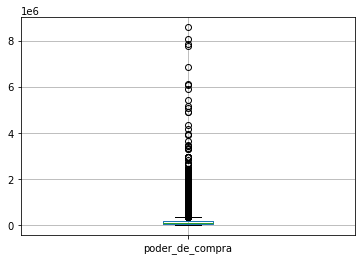

In [13]:
fp_df.boxplot(column="poder_de_compra")

<AxesSubplot:>

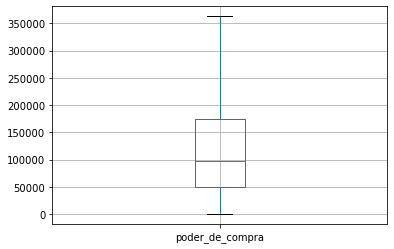

In [14]:
fp_df.boxplot(column="poder_de_compra", showfliers=False)

In [15]:
SPACE_COLS = ["Age", "Employment", "RemoteWork", "EdLevel", "OrgSize", "Country"]

def removeSpace(str):
    return str.replace(' ', '-').replace(',', '')

def handleSpaceCols(row, col):
    if row[col] is None:
        return 0
    return removeSpace(row[col])

fp_df = fp_df.drop(columns=["ResponseId_left", "CompTotal_left", "WorkExp_left", "ConvertedCompYearly_left", "ResponseId", "Q120", "MainBranch",
                            "CodingActivities", "LearnCode", "LearnCodeOnline", "LearnCodeCoursesCert", "DevType", "PurchaseInfluence",
                            "TechList", "BuyNewTool", "Currency", "CompTotal", "LanguageHaveWorkedWith", "LanguageWantToWorkWith", "DatabaseHaveWorkedWith",
                            "DatabaseWantToWorkWith", "PlatformHaveWorkedWith", "PlatformWantToWorkWith", "WebframeHaveWorkedWith", "WebframeWantToWorkWith",
                            "MiscTechHaveWorkedWith", "MiscTechWantToWorkWith", "ToolsTechHaveWorkedWith", "ToolsTechWantToWorkWith", "NEWCollabToolsHaveWorkedWith",
                            "NEWCollabToolsWantToWorkWith", "OpSysPersonal use", "OpSysProfessional use", "OfficeStackAsyncHaveWorkedWith",
                            "OfficeStackAsyncWantToWorkWith", "AISearchHaveWorkedWith", "AISearchWantToWorkWith", "AIDevHaveWorkedWith", 
                            "AIDevWantToWorkWith", "NEWSOSites", "SOVisitFreq", "SOAccount", "SOPartFreq", "SOComm", "SOAI", "AISelect", 
                            "AISent", "AIAcc", "AIBen", "AIToolInterested in Using", "AIToolCurrently Using", 
                            "AIToolNot interested in Using", "AINextVery different", "AINextNeither different nor similar", 
                            "AINextSomewhat similar", "AINextVery similar", "AINextSomewhat different", "TBranch", "ICorPM", "WorkExp", 
                            "Knowledge_1", "Knowledge_2", "Knowledge_3", "Knowledge_4", "Knowledge_5", "Knowledge_6", "Knowledge_7", 
                            "Knowledge_8", "Frequency_1", "Frequency_2", "Frequency_3", "TimeSearching", "TimeAnswering", "ProfessionalTech",
                            "Industry", "SurveyLength", "SurveyEase", "ConvertedCompYearly", "OfficeStackSyncHaveWorkedWith",
                            "OfficeStackSyncWantToWorkWith",
                            'stacks_APL', 'stacks_Ada', 'stacks_Apex', 'stacks_Assembly', 'stacks_Bash/Shell (all shells)', 
                            'stacks_C', 'stacks_C#', 'stacks_C++', 'stacks_Clojure', 'stacks_Cobol', 
                            'stacks_Crystal', 'stacks_Dart', 'stacks_Delphi', 'stacks_Elixir', 'stacks_Erlang', 
                            'stacks_F#', 'stacks_Flow', 'stacks_Fortran', 'stacks_GDScript', 'stacks_Go', 
                            'stacks_Groovy', 'stacks_HTML/CSS', 'stacks_Haskell', 'stacks_Java', 
                            'stacks_JavaScript', 'stacks_Julia', 'stacks_Kotlin', 'stacks_Lisp', 'stacks_Lua',
                            'stacks_MATLAB', 'stacks_Nim', 'stacks_OCaml', 'stacks_Objective-C', 'stacks_PHP',
                            'stacks_Perl', 'stacks_PowerShell', 'stacks_Prolog', 'stacks_Python', 'stacks_R',
                            'stacks_Raku', 'stacks_Ruby', 'stacks_Rust', 'stacks_SAS', 'stacks_SQL',
                            'stacks_Scala', 'stacks_Solidity', 'stacks_Swift', 'stacks_TypeScript',
                            'stacks_VBA', 'stacks_Visual Basic (.Net)', 'stacks_Zig'])
fp_df = fp_df.dropna(subset=["OrgSize"])
fp_df = fp_df[fp_df["poder_de_compra"] < 2000000]

for col in SPACE_COLS:
    fp_df[col] = fp_df.apply(lambda row: handleSpaceCols(row, col), axis=1)
fp_df.sample(1)

,YearsCode_left,YearsCodePro_left,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,OrgSize,Country,poder_de_compra,stacks,FinalDevType
66479,153,108,25-34-years-old,Employed-full-time,In-person,Master’s-degree-(M.A.-M.S.-M.Eng.-MBA-etc.),17,12,100-to-499-employees,Germany,95952.5,"[C, C#, C++, Delphi, Java, JavaScript, Python,...",embedded applications or devices


In [16]:
fp_df["quartile"] = pd.qcut(fp_df['poder_de_compra'], 4, labels=False)

fp_quartile_1 = fp_df[fp_df['quartile'] == 0]
fp_quartile_2 = fp_df[fp_df['quartile'] == 1]
fp_quartile_3 = fp_df[fp_df['quartile'] == 2]
fp_quartile_4 = fp_df[fp_df['quartile'] == 3]

# df_list = {"25":fp_quartile_1,"50":fp_quartile_2,"75": fp_quartile_3, "100": fp_quartile_4}
df_list = {"total":fp_df}

### Salvando no padrão

In [17]:
fp_df = fp_df.drop(columns=["quartile"])
fp_df.sample(1)

,YearsCode_left,YearsCodePro_left,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,OrgSize,Country,poder_de_compra,stacks,FinalDevType
35368,98,84,35-44-years-old,Independent-contractor-freelancer-or-self-empl...,Hybrid-(some-remote-some-in-person),Secondary-school-(e.g.-American-high-school-Ge...,14,12,Just-me---I-am-a-freelancer-sole-proprietor-etc.,Sweden,392064.21,"[Bash/Shell (all shells), C, C#, JavaScript, P...",full-stack


In [18]:
FP_COLUMNS = ["Age", "Employment", "RemoteWork", "EdLevel", "YearsCode", "YearsCodePro", "OrgSize", "Country", "FinalDevType"]

unique_stacks = fp_df["stacks"].explode().unique()

other_uniques = {}

for col in FP_COLUMNS:
    other_uniques[col] = fp_df[col].unique()

In [19]:
final_map = {}
size = 1

for i in range(unique_stacks.shape[0]):
    final_map[unique_stacks[i]] = size
    size += 1

for (col, uniques) in other_uniques.items():
    for i in range(uniques.shape[0]):
        final_map[str(uniques[i])] = size
        size += 1

In [20]:
OUTPUT_PATH = "./data/fp/out/"
FILE_NAME = "in_fp"

In [22]:
import subprocess

for quartile, df in df_list.items():
    casted_file = f"{OUTPUT_PATH}/{FILE_NAME}_{quartile}.txt"
    with open(casted_file, 'w') as file:
        file.write("@CONVERTED_FROM_TEXT\n")
        # Header
        for (key, item) in final_map.items():
            file.write(f"@ITEM={item}={key},\n")
        # Sequences
        for row in df.itertuples():
            casted_items = []
            for col in FP_COLUMNS:
                idd = final_map[str(getattr(row, col))]
                casted_items.append(str(idd))
            casted_items += list(map(lambda x: str(final_map[x]), row.stacks))
            file.write(f"{' '.join(casted_items)}\n")
    
        subprocess.run(["java", "-jar", "../HighUtilityItemsetMining/spmf.jar", "run", "FPGrowth_itemsets", f"{casted_file}",  f"{OUTPUT_PATH}/output_{quartile}.txt","30%"])

>/home/vinicius/UFMG/8p/AD/TP/HighUtilityItemsetMining/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 38871
 Max memory usage: 66.5316162109375 mb 
 Frequent itemsets count : 31
 Total time ~ 429 ms
Post-processing to show result in terms of string values.
Post-processing completed.
